## 1. Import & 데이터 준비

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [36]:
df=pd.read_csv("train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 2. 전처리

In [38]:
# datetime method

df['datetime']=df.datetime.apply(pd.to_datetime)

df['year'] = df.datetime.apply(lambda x : x.year)
df['month'] = df.datetime.apply(lambda x : x.month)
df['day'] = df.datetime.apply(lambda x : x.day)
df['hour'] = df.datetime.apply(lambda x : x.hour)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [39]:
## 컬럼 삭제
df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


## 3. RMSLE / RMSE / MAE 정의

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
# RMSLE
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squred_error= (log_y-log_pred)**2
    rmsle= np.sqrt(np.mean(squred_error))
    return rmsle

In [42]:
#RMSE
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

In [43]:
# MSE, RMSE, RMSLE 
def evalute_regr(y, pred):
    rmsle_val =  rmsle(y, pred)
    rmse_val =  rmse(y, pred)
    mae_val = mean_absolute_error(y,pred)
    print("RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}".format(rmsle_val, rmse_val, mae_val))

## 4. 로그변환, 피처 인코딩, 모델학습/예측/평가

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#### split

In [45]:
y = df['count']
X= df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 선형회귀

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
evalute_regr(y_test, y_pred)
# RMSLE: 1.165, RMSE: 140.900, MAE: 105.924

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


#### 큰 오류값 확인

In [47]:
def get_top_error(y_test, y_pred, n_tops=5):
    result_df=pd.DataFrame(y_test.values, columns=['real_count']) #real_count
    result_df['predicted_count']=np.round(y_pred) #predicted_count
    result_df['diff']=np.abs(result_df['real_count']- result_df['predicted_count']) #diff
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
get_top_error(y_test, y_pred, n_tops=5) # 실제값- 예측값 차이 너무 큼 

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


#### y 정규성 의심 --> log(y) +1

<AxesSubplot:>

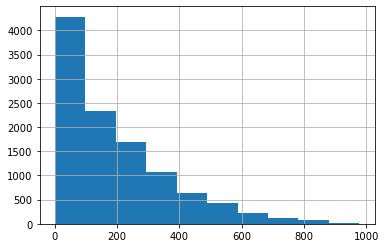

In [48]:
y.hist()

<AxesSubplot:>

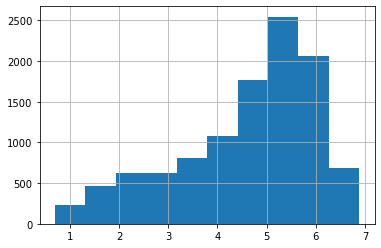

In [49]:
y_log=np.log1p(y)
y_log.hist()

#### y_log를 y_target 반영, 다시 학습

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# test 데이터셋의 로그 변환된 y 원래대로 변환, y_pred도 
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

evalute_regr(y_test_exp, y_pred_exp)
# RMSLE: 1.017, RMSE: 162.594, RMSLE: 109.286

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


#### RMSLE, RMSLE 감소, RMSE 증가
#### 회귀계수값 시각화

<AxesSubplot:>

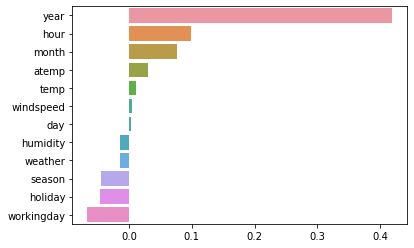

In [51]:
coef = pd.Series(lr.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

#### year 회귀계수 너무 큼 --> 겟더미

In [52]:
X_oh = pd.get_dummies(X, columns= ['year', 'month','day', 'hour', 'holiday','workingday','season','weather'])
X_oh.head(3)

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0


#### X 원핫인코딩 반영

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_oh, y_log, test_size=0.3, random_state=0)

#### model, train/test dataset 입력하면 성능 평가 수치 반환 def

In [56]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        y_pred=np.expm1(y_pred)
    print("===", model.__class__.__name__,"===")
    evalute_regr(y_test, y_pred)

In [57]:
lr = LinearRegression()
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=0.01)

for model in [lr, ridge, lasso]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

=== LinearRegression ===
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
=== Ridge ===
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
=== Lasso ===
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


<AxesSubplot:>

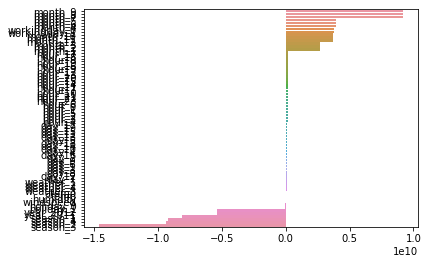

In [58]:
coef = pd.Series(lr.coef_, index=X_oh.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

<AxesSubplot:>

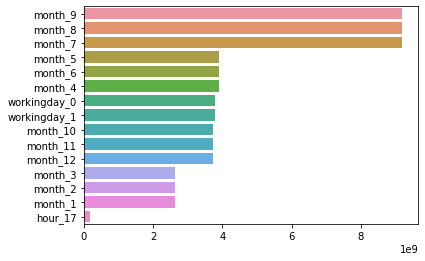

In [59]:
coef = pd.Series(lr.coef_, index=X_oh.columns)
coef_sort = coef.sort_values(ascending=False)[:15]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

## 회귀 트리

In [60]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### RandomForest, GBM, XGBoost, LightGBM

In [61]:
rf = RandomForestRegressor(n_estimators=500)
gbm= GradientBoostingRegressor(n_estimators=500)
xgb=XGBRegressor(n_estimators=500)
lgbm=LGBMRegressor(n_estimators=500)

for model in [rf, gbm, xgb, lgbm]:
    get_model_predict(model, X_train, X_test, y_train.values, y_test.values, is_expm1=True)

=== RandomForestRegressor ===
RMSLE: 0.355, RMSE: 50.274, MAE: 31.145
=== GradientBoostingRegressor ===
RMSLE: 0.330, RMSE: 53.345, MAE: 32.746
=== XGBRegressor ===
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251
=== LGBMRegressor ===
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029
